# Exercise 04: Linear Regression


In [159]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [160]:
import pandas as pd # install package 'pandas' with "conda install pandas" or "pip install pandas"

## 1. Simple Linear Regression (Chocolate stores)

You are working for a high-end chocolate manufacturer and are considering the launch of a new very high-end chocolate bar. To decide on the ideal selling price, you have conducted an experiment in 6 stores and offered the new product for different prices for the same two weeks. You can find the number of products sold in the table on the right side.

|Shop	     |Price       |Units sold |
|------------|------------|-----------|
|1           |20          |0          |
|2           |16          |3          |
|3           |15          |7          |
|4           |16          |4          |
|5           |13          |6          |
|6           |10          |10         |

We consider the relationship between `price` and `sold units`.

### 1.1 Determine the weights $w_0, w_1$ for a linear regression model with 'units sold' as dependent variable.

The derivation of the equation can be found at the lecture notes from [Prof. Kirchner](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)

Estimating $w_0$ and $w_1$ is done as

$w_0=\bar{y}-w_1\bar{x}$

$w_1 =\frac{Cov(X,Y)}{Var(X)}=\frac{\frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\frac{1}{n}\sum_{i=1}^{n} (x_i-\bar{x})^2}$


In [161]:
''' Data '''
data = np.array([[20, 0],[16, 3],[15, 7],[16, 4], [13, 6], [10, 10]])
X = data[:,[0]]
y = data[:,[1]]
print ("Independent variable:", X, type(X))
print ("Dependent variable:", y, type(y))

Independent variable: [[20]
 [16]
 [15]
 [16]
 [13]
 [10]] <class 'numpy.ndarray'>
Dependent variable: [[ 0]
 [ 3]
 [ 7]
 [ 4]
 [ 6]
 [10]] <class 'numpy.ndarray'>


In [162]:
def w1_estimate1D(x, y):
    enum = 0
    div = 0
    Xmean = np.mean(X)
    Ymean = np.mean(y)
    size = len(x)
    for i in range(len(X)):
        enum += (X[i] - Xmean)*(y[i] - Ymean)
    enum /= size    
    for point in x:
        div += (point - Xmean)**2
    div /= size
    
    return enum/div

def w0_estimate1D(x, y, w1):
    return (np.mean(y) - w1 * np.mean(x))

w1 = w1_estimate1D(X, y)
w0 = w0_estimate1D(X, y, w1)
print (f"w0 = {w0}, w1 = {w1}")

w0 = [19.73214286], w1 = [-0.98214286]


### 1.2 Draw a scatter plot of the data and the regression line.

Now let's plot the data points and our regression line. Is it plausible?

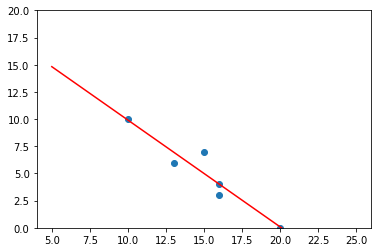

In [163]:
plt.plot(X, y, 'o')
plt.ylim([0,20])
plt.plot(np.linspace(5, 25, 2), np.linspace(5, 25, 2) * w1 + w0, '-r')
plt.show()


In [164]:
# error -> run all
SStot = 0
Ymean = np.mean(y)
for why in y:
    SStot += (why - Ymean)**2
SSreg = 0
for point in data:
    SSreg += (w0 + point[0] * w1 - Ymean)**2
SSres = 0
for point in data:
    SSres += (point[1] - (w0 + w1 * point[0]))**2
print("r² = ", 1 - (SSres/SStot), " = ", SSreg/SStot)

r² =  [0.90029762]  =  [0.90029762]


## 2. Multiple Linear Regression

Given the car dataset below, how can we predict the `miles per gallon` from cylinders, displacement, horsepower, weight, acceleration and year?

### 2.1 Dataset

In [165]:
data = pd.read_csv("./dataset/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


Select the relevant columns and convert them to numpy ndarrays:

In [166]:
x_column_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
y_column_name = 'mpg'
X = data[x_column_names].values
y = data[[y_column_name]].values
print(y)
N = X.shape[0]
P = X.shape[1]
print(f"Data points: {N} Independent Variables: {P}")

[[18. ]
 [15. ]
 [18. ]
 [16. ]
 [17. ]
 [15. ]
 [14. ]
 [14. ]
 [14. ]
 [15. ]
 [15. ]
 [14. ]
 [15. ]
 [14. ]
 [24. ]
 [22. ]
 [18. ]
 [21. ]
 [27. ]
 [26. ]
 [25. ]
 [24. ]
 [25. ]
 [26. ]
 [21. ]
 [10. ]
 [10. ]
 [11. ]
 [ 9. ]
 [27. ]
 [28. ]
 [25. ]
 [19. ]
 [16. ]
 [17. ]
 [19. ]
 [18. ]
 [14. ]
 [14. ]
 [14. ]
 [14. ]
 [12. ]
 [13. ]
 [13. ]
 [18. ]
 [22. ]
 [19. ]
 [18. ]
 [23. ]
 [28. ]
 [30. ]
 [30. ]
 [31. ]
 [35. ]
 [27. ]
 [26. ]
 [24. ]
 [25. ]
 [23. ]
 [20. ]
 [21. ]
 [13. ]
 [14. ]
 [15. ]
 [14. ]
 [17. ]
 [11. ]
 [13. ]
 [12. ]
 [13. ]
 [19. ]
 [15. ]
 [13. ]
 [13. ]
 [14. ]
 [18. ]
 [22. ]
 [21. ]
 [26. ]
 [22. ]
 [28. ]
 [23. ]
 [28. ]
 [27. ]
 [13. ]
 [14. ]
 [13. ]
 [14. ]
 [15. ]
 [12. ]
 [13. ]
 [13. ]
 [14. ]
 [13. ]
 [12. ]
 [13. ]
 [18. ]
 [16. ]
 [18. ]
 [18. ]
 [23. ]
 [26. ]
 [11. ]
 [12. ]
 [13. ]
 [12. ]
 [18. ]
 [20. ]
 [21. ]
 [22. ]
 [18. ]
 [19. ]
 [21. ]
 [26. ]
 [15. ]
 [16. ]
 [29. ]
 [24. ]
 [20. ]
 [19. ]
 [15. ]
 [24. ]
 [20. ]
 [11. ]
 [20. ]


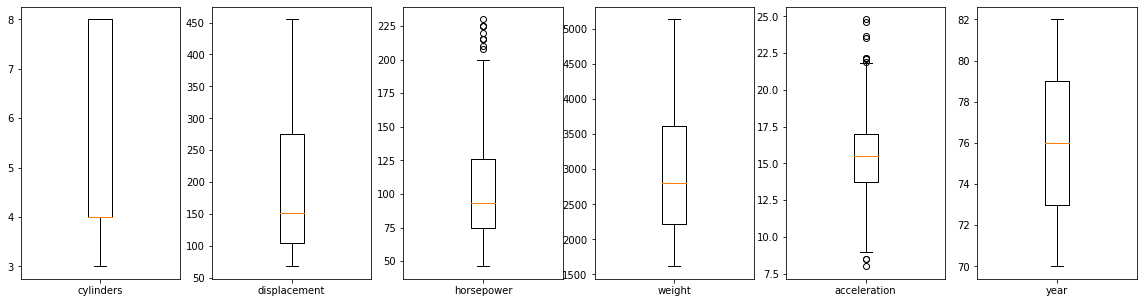

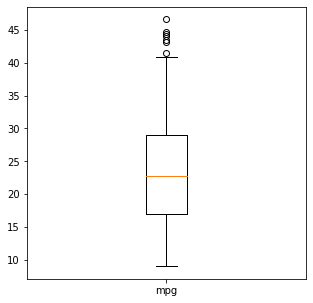

In [167]:
# Plot stats of independent variables
plt.figure(figsize=(20,5))
for index, column_name in enumerate(x_column_names):
    plt.subplot(1, P, index+1)
    plt.boxplot(X[:,index])
    plt.xticks([1], [x_column_names[index]])
plt.show()
    
# Plot stats of dependent variable
plt.figure(figsize=(5,5))
plt.boxplot(y, whis=True)
plt.xticks([1], [y_column_name])
plt.show()

### 2.2 Ordinary least squares

Reminder: The model of Multiple Linear Regression in matrix form is
$$
\mathbf{y} = \mathbf{X \beta} + \mathbf{\epsilon}
$$

The estimates of the regression coefficients $\mathbf{b}$ are obtained by calculating:
$$
\mathbf{b} 
= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [168]:
# Calculate normal equations
def ols_mlr(X, y):
    """
    X: data matrix (n rows, k columns)
    y: dependent variable  (n rows, 1 column)
    return: parameter vector w (k+1 rows, 1 column), predictions y_hat, difference y - y_hat
    """
    N = X.shape[0]
    
    # Add column of constant 1 (for y-intercept w_0)
    X = np.concatenate((np.ones((N, 1)), X), axis=1)

    # Estimate parameter vector w = (X^T X)^-1 X^T y
    w = np.dot(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
    
    # Calculate y_hat_i = w^T x_i for all data points
    y_hat = np.dot(X, w)
        
    # The point-wise difference between y and y_hat. We use it later to calculate different errors.
    pdiff = (y - y_hat) 

    # we pass back the parameter vector, the predictions and the point-wise differences
    return (w, y_hat, pdiff) 

In [169]:
#w, y_hat, pdiff, rss = ols_mlr(X, y)
w, y_hat, pdiff = ols_mlr(X, y)

### 2.3 Evaluate quality of the model

#### 2.3.1 Error Measures

In [170]:
""" We use different error measures to assess the quality of the model. """
ss_total = lambda y : np.sum( (y - np.mean(y)) ** 2.)
ss_reg = lambda y, y_hat : np.sum((y_hat - np.mean(y)) ** 2.)
ss_res = lambda diff : np.sum(diff**2.)
mse = lambda diff : np.mean(diff**2.)
rmse = lambda diff : np.sqrt(mse(diff))
mae = lambda diff : np.mean(np.abs(diff))
mrae = lambda diff : np.mean(np.abs(diff)/y)
print("SS_tot: %.3f" % ss_total(y))       # total sum of squares
print("SS_reg: %.3f" % ss_reg(y, y_hat))  # explained sum of squares
print("SS_res: %.3f" % ss_res(pdiff))     # residual sum of squares
print("MSE: %.3f" % mse(pdiff))  # mean squared error (variance of error), aka "average SS_res per data point"
print("RMSE: %.3f" % rmse(pdiff)) # standard deviation of error
print("MAE: %.3f" % mae(pdiff)) # off by +- 2.6 on average

SS_tot: 23818.993
SS_reg: 19275.646
SS_res: 4543.347
MSE: 11.590
RMSE: 3.404
MAE: 2.618


#### 2.3.2 Graphically: $y_i$ vs $\hat{y}_i$

Let's inspect where our model is making mistakes. Print true values $y_i$ against $\hat{y}_i$: 

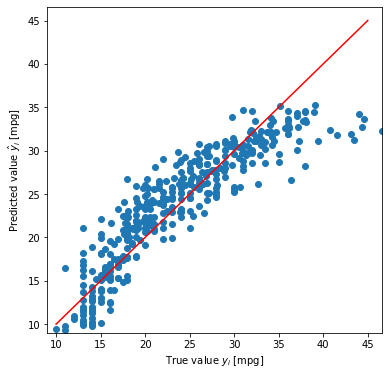

In [171]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_hat)
plt.xlim([min(y), max(y)])
plt.ylim([min(y), max(y)])
plt.xlabel(f"True value $y_i$ [{y_column_name}]")
plt.ylabel("Predicted value $\hat{y}_i$ [%s]" % y_column_name)
plt.plot(np.linspace(10, 45, 100), np.linspace(10, 45, 100), 'r-')
plt.show()
# -> In the high mpg range, our model underestimates the true values

### 2.3.3 Coefficient of Determination $r^2$

The dependent variable $y$ has some intrinsic variability (see figure below). The error made by a very naive model that only predicts the mean $\bar{y}$ independently of any variables $x$ is "ss_total".

When we calculate $r^2$, we compare our model with this naive model.

One part of the variability in $y$ can be explained by a linear combination of the independent variables (our model): "ss_reg". The remaining variability is due to some other randomness we don't know about: "ss_res". $r^2$ is the proportion of variability in the response variable y that is attributable to the linear relationship with the independent variables $x$.

-> about $81 \%$ of the variability in `mpg` can be explained by the linear relationship with $x$.

r²: 0.809


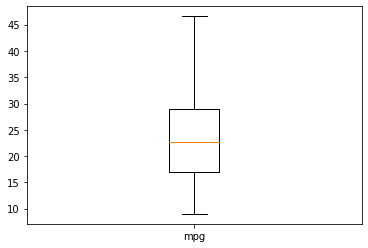

In [172]:
plt.figure()
print("r²: %.3f" % (1 -  ss_res(pdiff) / ss_total(y)))
plt.boxplot(y, vert=True)
plt.xticks([1], [f"{y_column_name}"])
plt.show()

## 2.4 Predict mpg for an arbitrary car

In [173]:
def oracle(params, n_cylinder, displacement, horsepower, weight, acceleration, year): 
    """
    Predict mpg based on independent variables
    """
    return np.dot(params.transpose(), [1, n_cylinder, displacement, horsepower, weight, acceleration, year])

In [174]:
predicted_mpg = oracle(w, 4, 150, 120, 3000, 15, 76)
print("Your car runs %.2f miles per gallon!" % predicted_mpg)

Your car runs 23.40 miles per gallon!
